## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 24.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.2 requires scikit-lear

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

## Loading the dataset

In [5]:
data = pd.read_csv("/content/Loan_Modelling.csv")

In [6]:
df = data.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
data.shape

(5000, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* 5000 observations in the dataset.
* All values are of numerical type (int, float).

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observation:

* Min **Age** is 23, max is 67, average Age is 45 years old.
* Min **Experience** is -3 years.
* Min **Income** is USD 46k, max is USD224k and average is USD64k
* Min **Family** size is 1, max is 4 and average is 2.
* Min **CCAvg** is USD 0k, max is USD 10k and average is USD 1.5k
* **Education** is categorial variable:
1:Undergrad; 2: Graduate; 3:Advanced/Professional
* Min **Mortgage** is USD 0k, max is USD 635k and average is USD 0k
* **Personal_Loan** is categorical variable where 1: Undergrad; 2: Graduate; 3:Advanced/ Professional
* **Securities_Account** is categorical where 1: customer has Securities_Account, 0: customer does not have Securities_Account
* **CD_Account** is categorical variable where 1: customer has CD_Account 0: customer does not have CD_Account
* **Online** is categorical variable where 1:customer uses online banking, 0:customer does not use online banking
* **CreditCard** is categorical variable where 1: customer use a credit card, 0: customer does not use credit card


In [12]:
df[df.duplicated()].count()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


There is no duplicate data in the data.

In [13]:
df.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


In [14]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


ID has 5000 unique values. So, it can be dropped.

In [15]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [17]:
df[df.duplicated()].count()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


In [18]:
df.nunique()

,0
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2
Securities_Account,2


In [20]:
#df.drop(['ID'], axis=1, inplace=True)
#df.head()

In [21]:
cat_features = ['Family', 'Education']

for feature in cat_features:
    df[feature] = pd.Categorical(df[feature])

* We can change family, education to categorical variables.

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,NaN,NaN,NaN,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,NaN,NaN,NaN,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,NaN,NaN,NaN,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [23]:
df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


In [24]:
df.isnull().values.any() # If there are any null values in data set

False

In [25]:
numerical_feature_df = df.select_dtypes(include=['int64','float64'])
numerical_feature_df.skew()

,0
Age,-0.029341
Experience,-0.026325
Income,0.841339
ZIPCode,-0.296165
CCAvg,1.598443
Mortgage,2.104002
Personal_Loan,2.743607
Securities_Account,2.588268
CD_Account,3.691714
Online,-0.394785


* **Income**, **CCAvg**, and **Mortgage** are heavily skewed.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [26]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [27]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [28]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [29]:
data["Education"].unique()

array([1, 2, 3])

```
# This is formatted as code
```

### Feature Engineering

In [30]:
data["ZIPCode"].nunique()

467

In [31]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [32]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### **Univariate Analysis**

In [33]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on **Age**

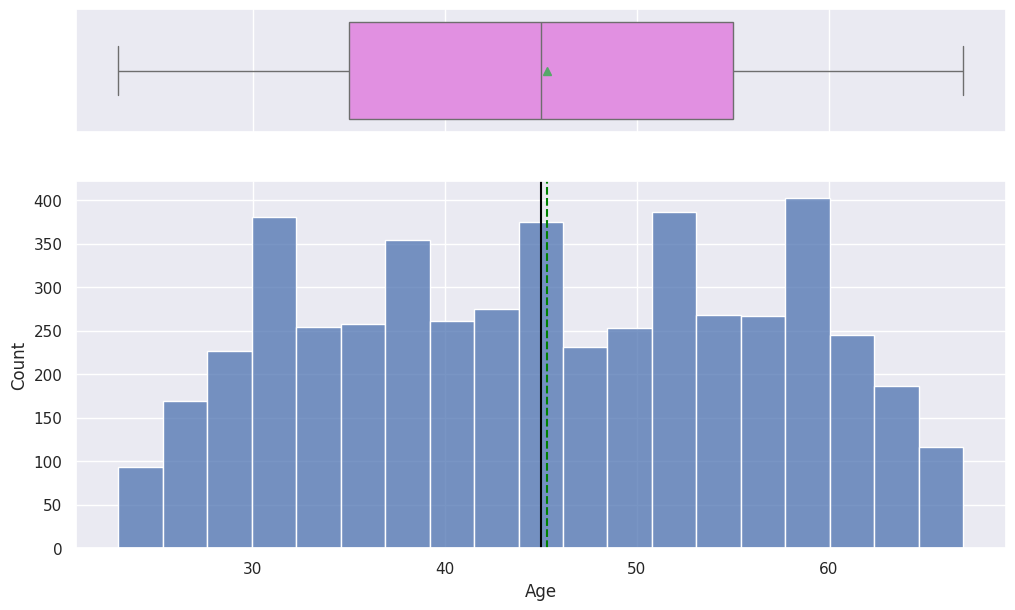

In [35]:
histogram_boxplot(data, "Age")

* The min is 23, max is 67, average is 45 years old.
* Data is unifromly distributed.
* There are no outliers.
* Maximum number of clients is within 58-60 years old range.

#### Observations on **Experience**

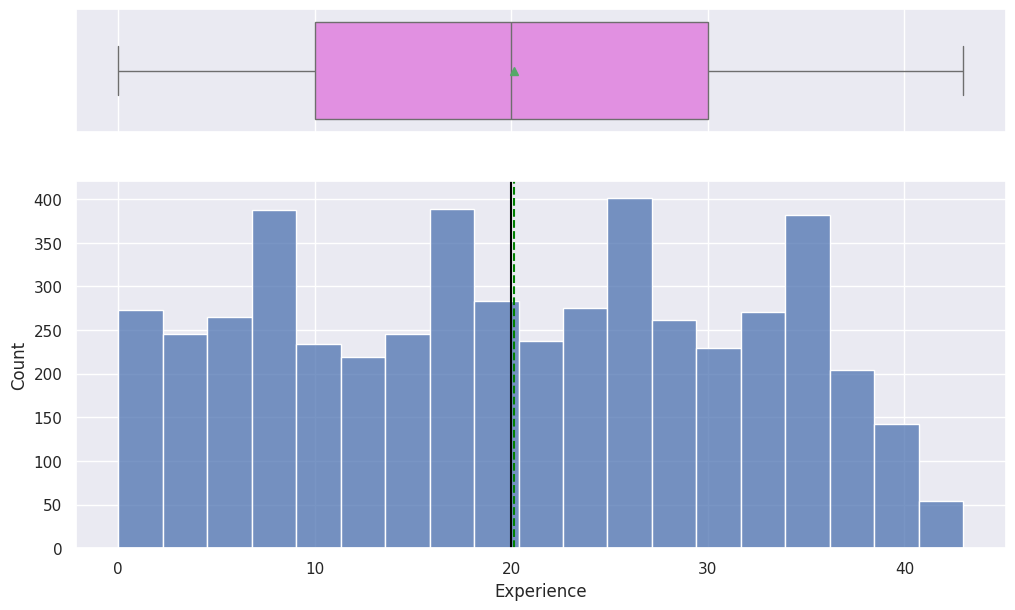

In [36]:
histogram_boxplot(data, 'Experience')

* Min experience is 0 years, maximum is 43 and the mean is approximately 20 years.
* There are no outliers.
* Data is uniformly distributed with peaks at 12-14 years and 28-30 years.

#### Observations on **Income**

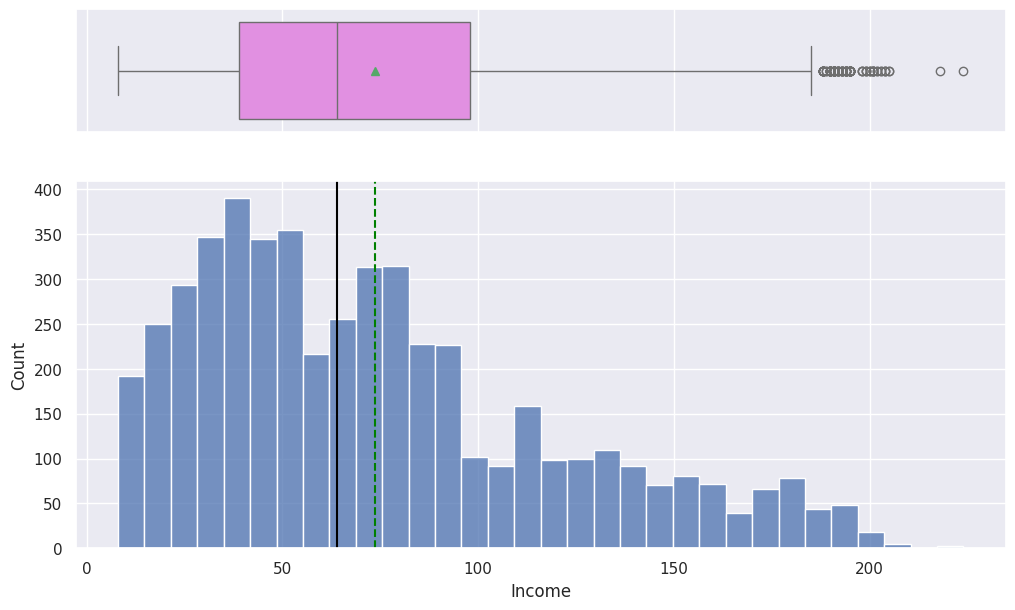

In [37]:
histogram_boxplot(data, "Income")

* Min Income is USD 46k, max is USD 224k, average is USD 64k.
* Dataset is right skewed.
* There is a number of outliers, yet they seem to be consistent with data hence no action is required.


#### Observations on **CCAvg**

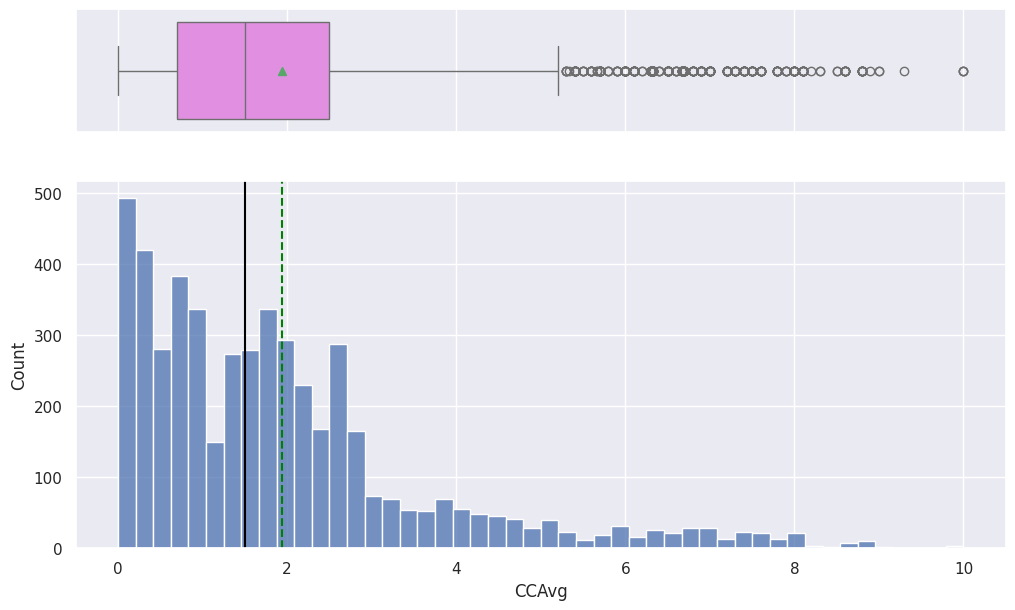

In [38]:
histogram_boxplot(data, "CCAvg")

* Min CCAvg is USD 0k, max is USD 1.9k and average is USD 1.9k
* Dataset is right skewed with a number of outliers.

#### Observations on **Mortgage**

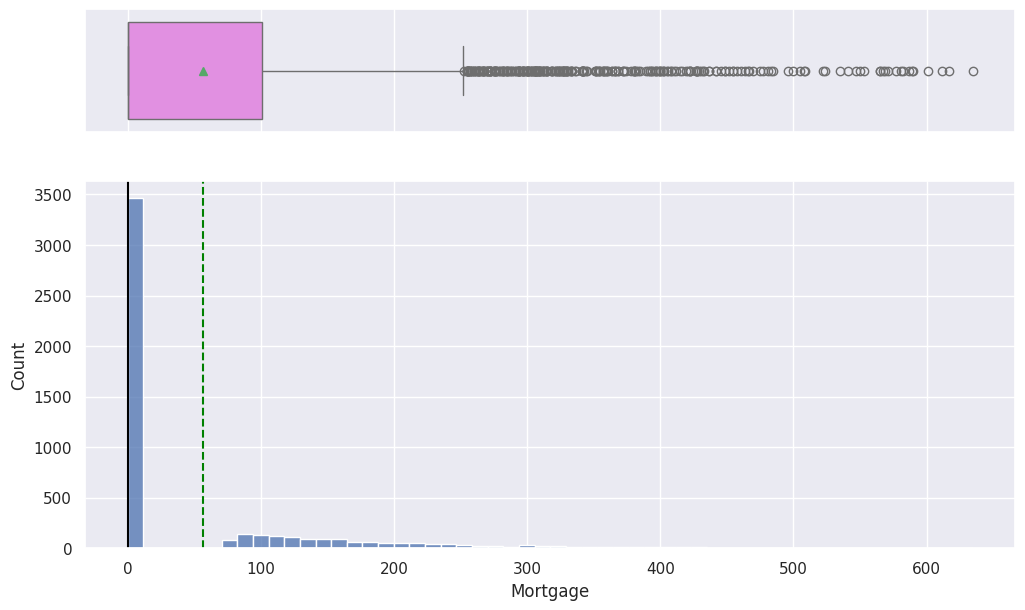

In [39]:
histogram_boxplot(data, "Mortgage")

* Min Mortgage is USD 0k, max is USD 635k, average is USD 0k.
* Dataset is right skewed.

#### Observations on **Family**

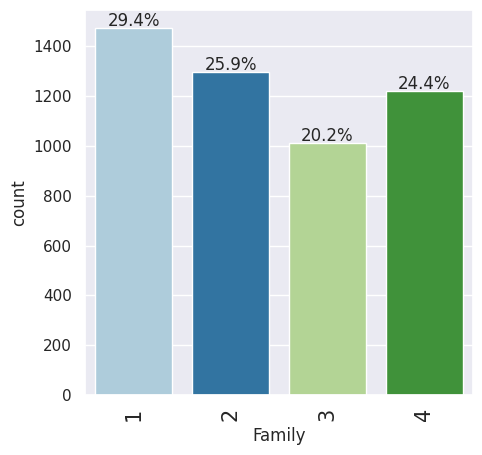

In [40]:
labeled_barplot(data, "Family", perc=True)

The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.

#### Observations on **Education**

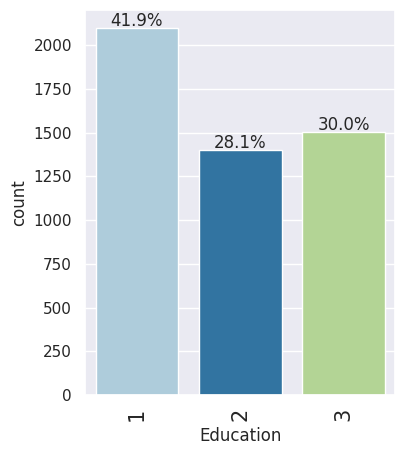

In [41]:
labeled_barplot(data, "Education", perc = True)

* 41.9% of customers are 1: Undergrad
* 28.1% of customers are 2: Graduate
* 30.0% of customers are 3: Advanced/ Professional

#### Observations on **Securities_Account**

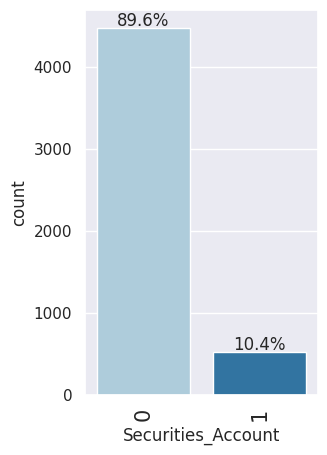

In [42]:
labeled_barplot(data, "Securities_Account", perc = True)

* Customers without securities_account make up the greatest proportion with 89.6%.

#### Observations on **CD_Account**

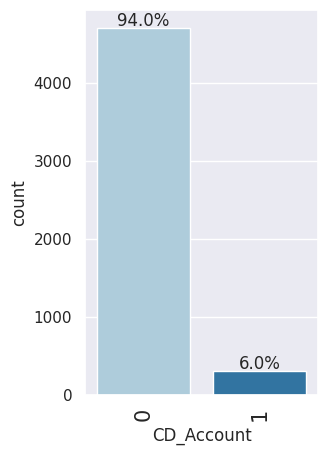

In [43]:
labeled_barplot(data, "CD_Account", perc = True)

* 94% of customers Do Not have CD_Account
* 6% only have CD_Account

#### Observations on **Online**

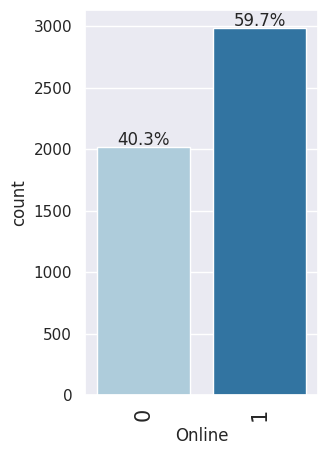

In [44]:
labeled_barplot(data, "Online", perc = True)

* 59.7% of customers use online banking services
* 40.3% of customers do not use online banking services

#### Observation on **CreditCard**

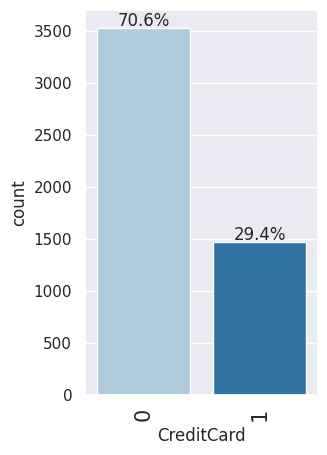

In [45]:
labeled_barplot(data, "CreditCard", perc = True)

* 70.6% of customers do not use credit card issued by different bank
* 29.4% of customers use credit card issued by different bank

#### Observation on **ZIPCode**

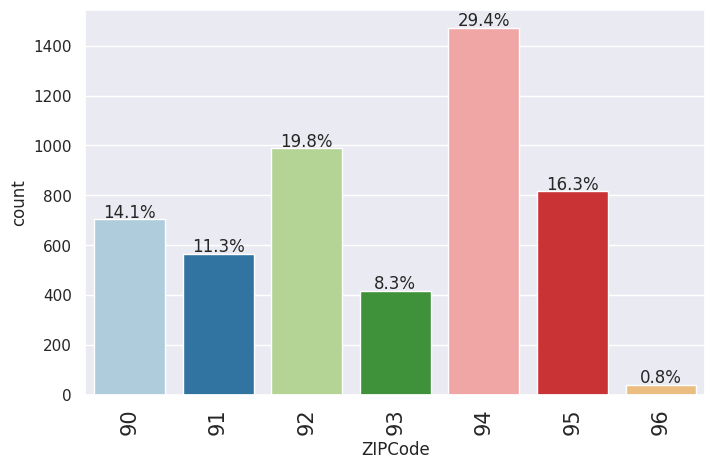

In [46]:
labeled_barplot(data, "ZIPCode", perc = True)

###** Bivariate Analysis**

In [47]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

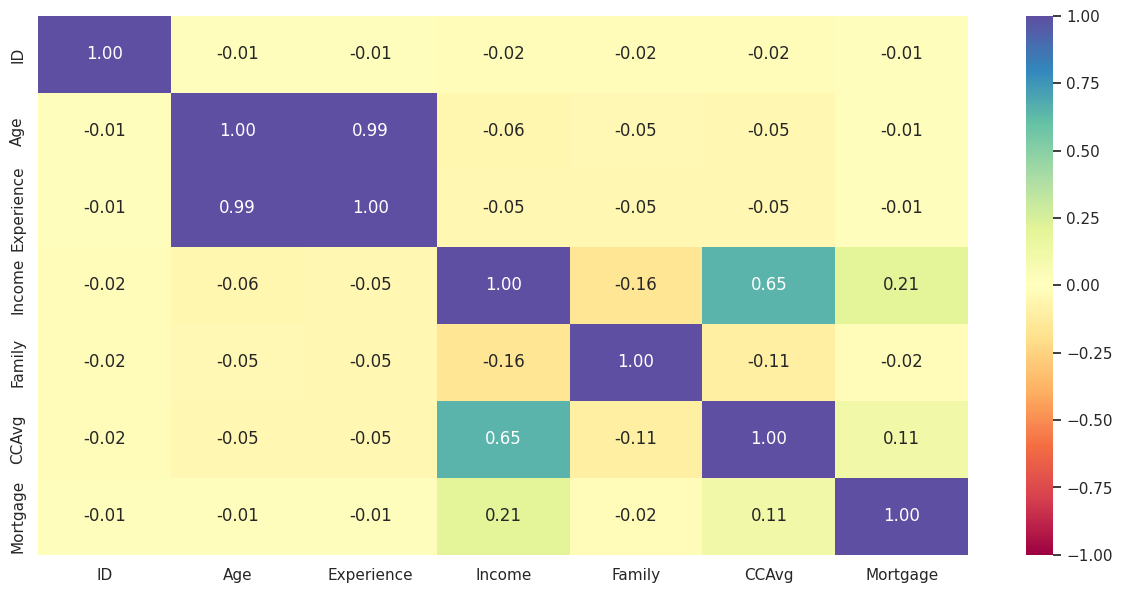

In [49]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

* Correlation between Age and Experience is very high (value = 0.99)
* Correlation between Income and CCAvg is low (value = 0.65)
* All other correlation values are small for consideration

#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


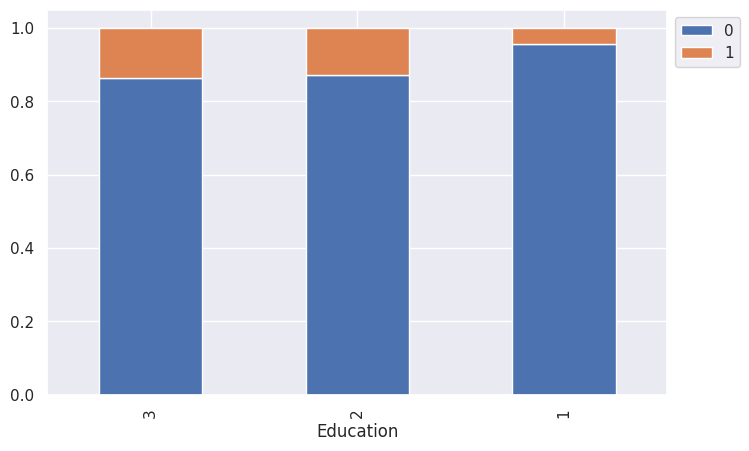

In [50]:
stacked_barplot(data, "Education", "Personal_Loan")

* Customes with education '2' and '3' hold a greater percentage of personal loans that those customer with education of '1'.

#### **Personal_Loan** vs **Family**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


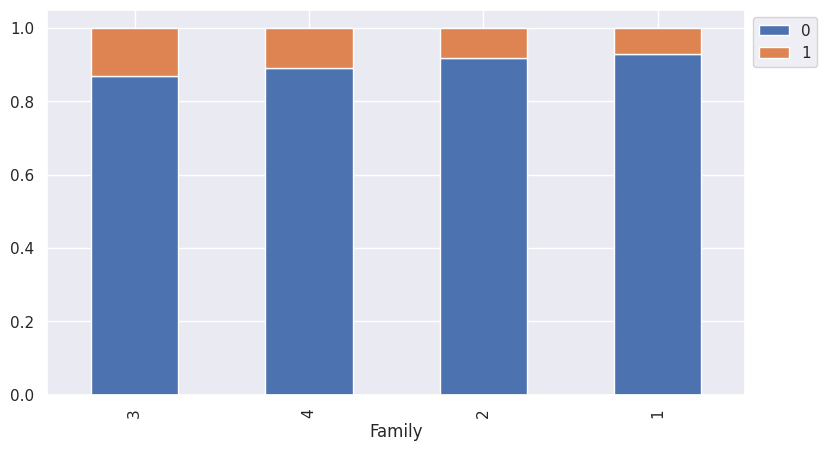

In [51]:
stacked_barplot(data, "Family", "Personal_Loan")

* Customers with family of 4 have more personal loans.
* A family of 3 have the second most personal loans followed by a family of 1 and 2.

#### **Personal_Loan** vs **Securities_Account**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


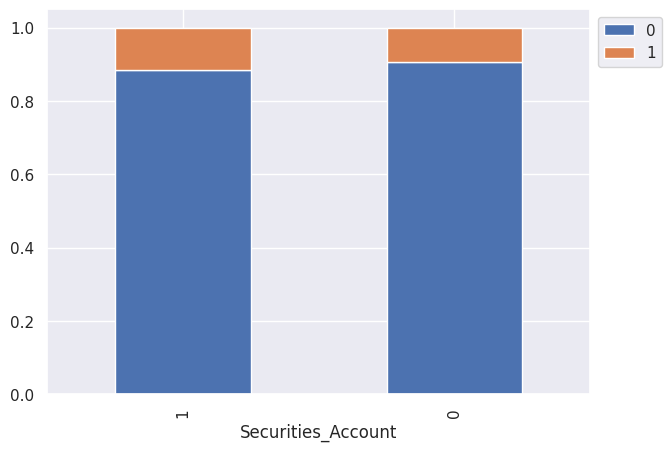

In [52]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

* Not much difference in securities account vs personal loans.

#### **Personal_Loan** vs **CD_Account**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


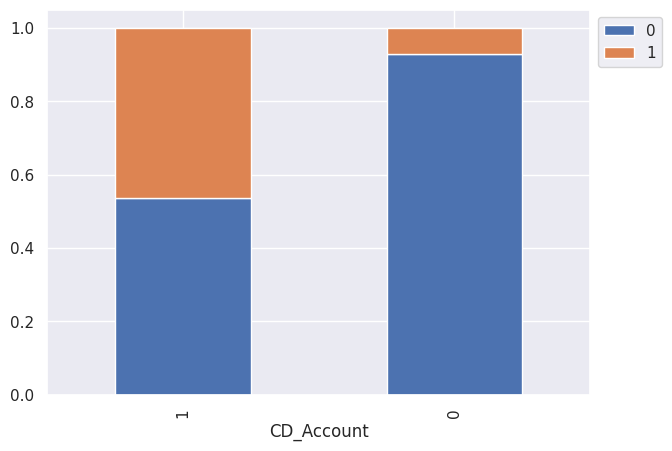

In [53]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Customers with cd_accounts have greater percentage of personal loans than those customers without cd_accounts.

#### **Personal_Loan** vs **Online**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


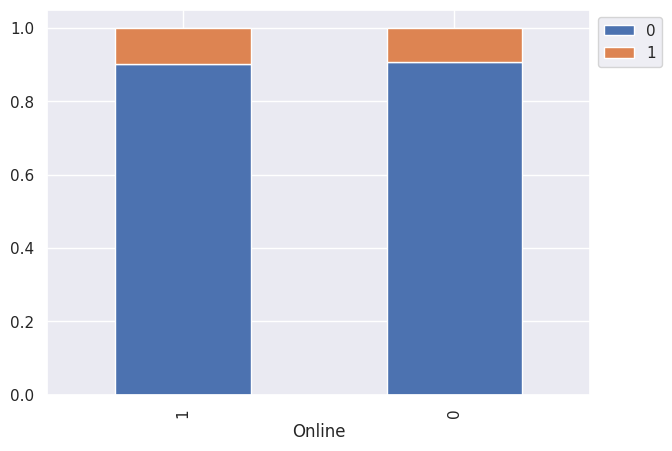

In [54]:
stacked_barplot(data, "Online", "Personal_Loan")

* There is not much difference customers who use online facilities and those who do not use online facilities versus personal loans.

#### **Personal_Loan** vs **CreditCard**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


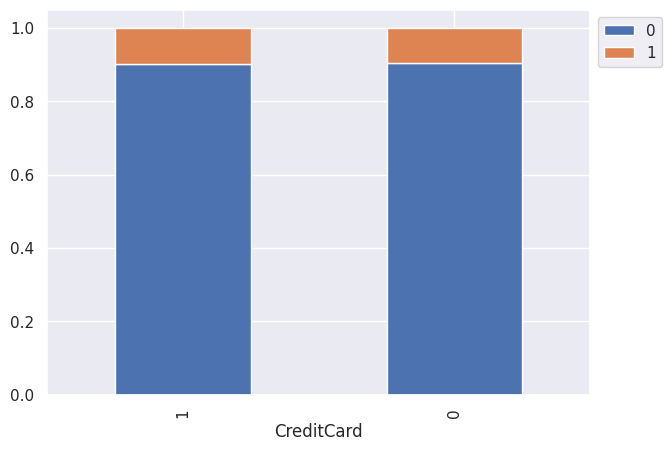

In [55]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* There is not much difference between those who have credit cards from other banks versus personal loans.

#### **Personal_Loan** vs **ZIPCode**

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


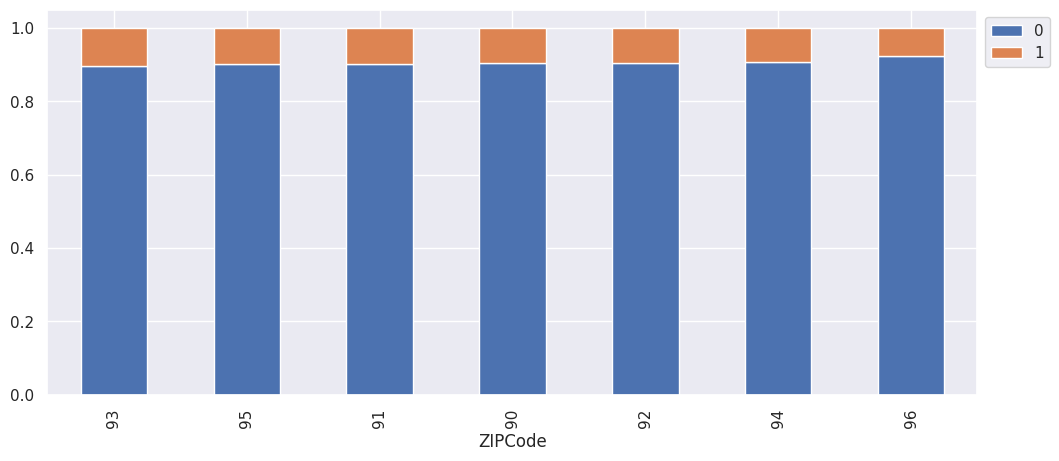

In [56]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

#### Let's check how a customer's interest in purchasing a loan varies with their age



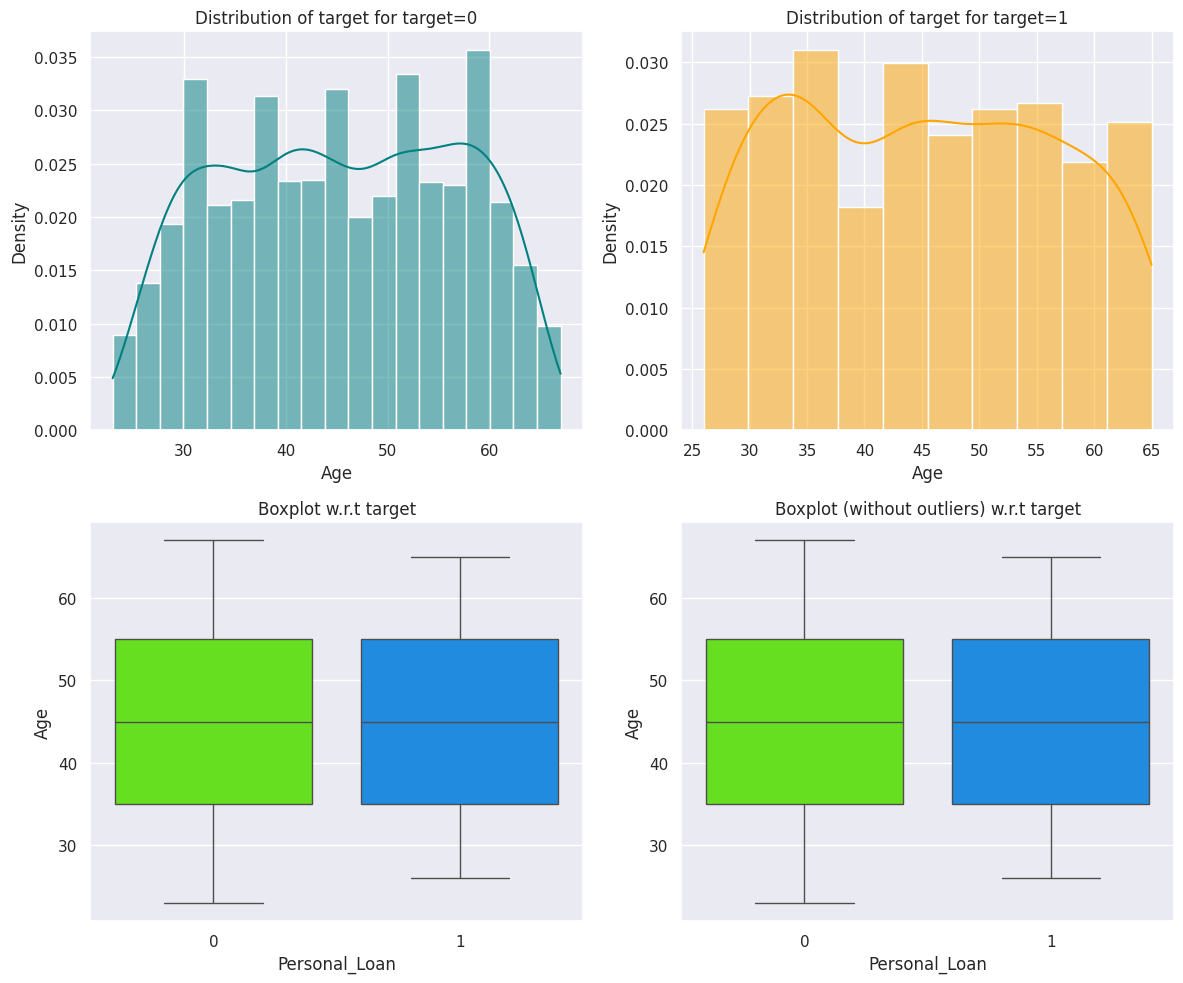

In [57]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Mean age for customers accepting and not accepting personal loan is close to the value of 45 years.

#### **Personal Loan** vs **Experience**

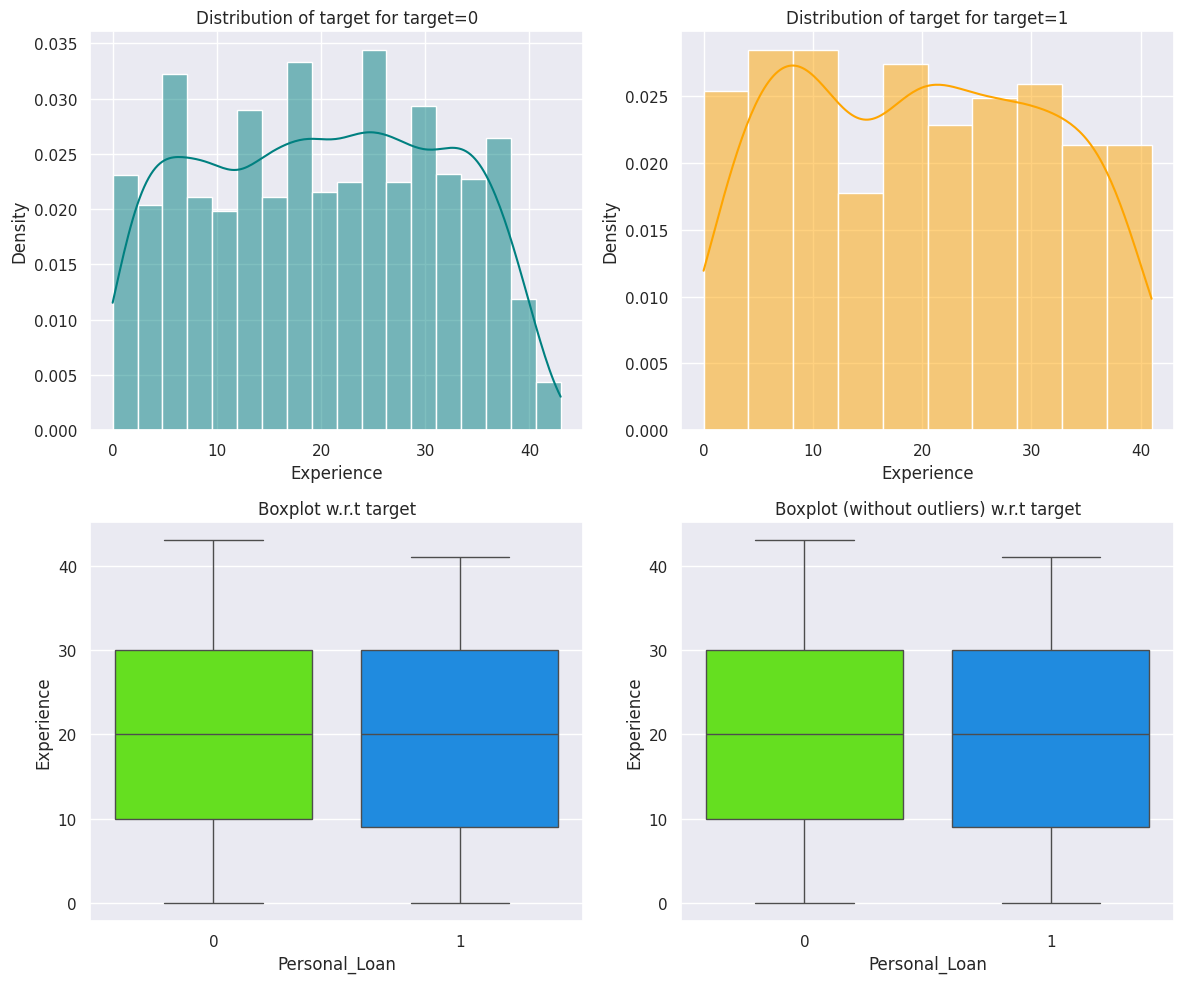

In [58]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* Mean Experience for customers accepting and not accepting personal loan is very close to the value of 20 years.

#### **Personal Loan** vs **Income**

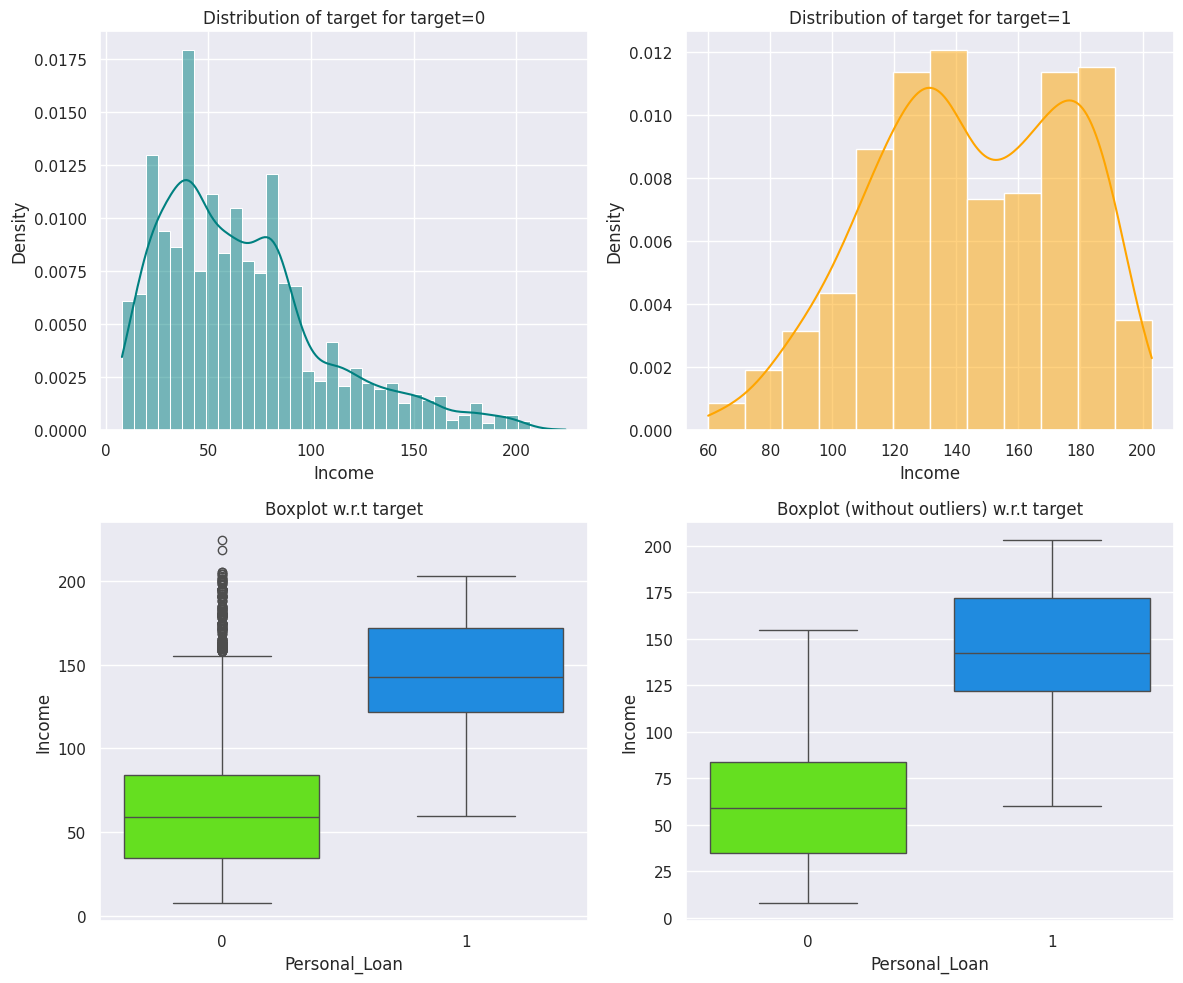

In [59]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Income variable varies greatly between customers who accepted and not accepted personal loan.
* Mean income for customers who did not accept the loan is approximately USD65k
* Mean income for customers who accept the loan is approximatly USD 145k
* This shows that income level of customer has a high impact on customer decision to accept a personal laon.
* The higher the income, the more chances the customer will accept a personal loan.

#### **Personal Loan** vs **CCAvg**

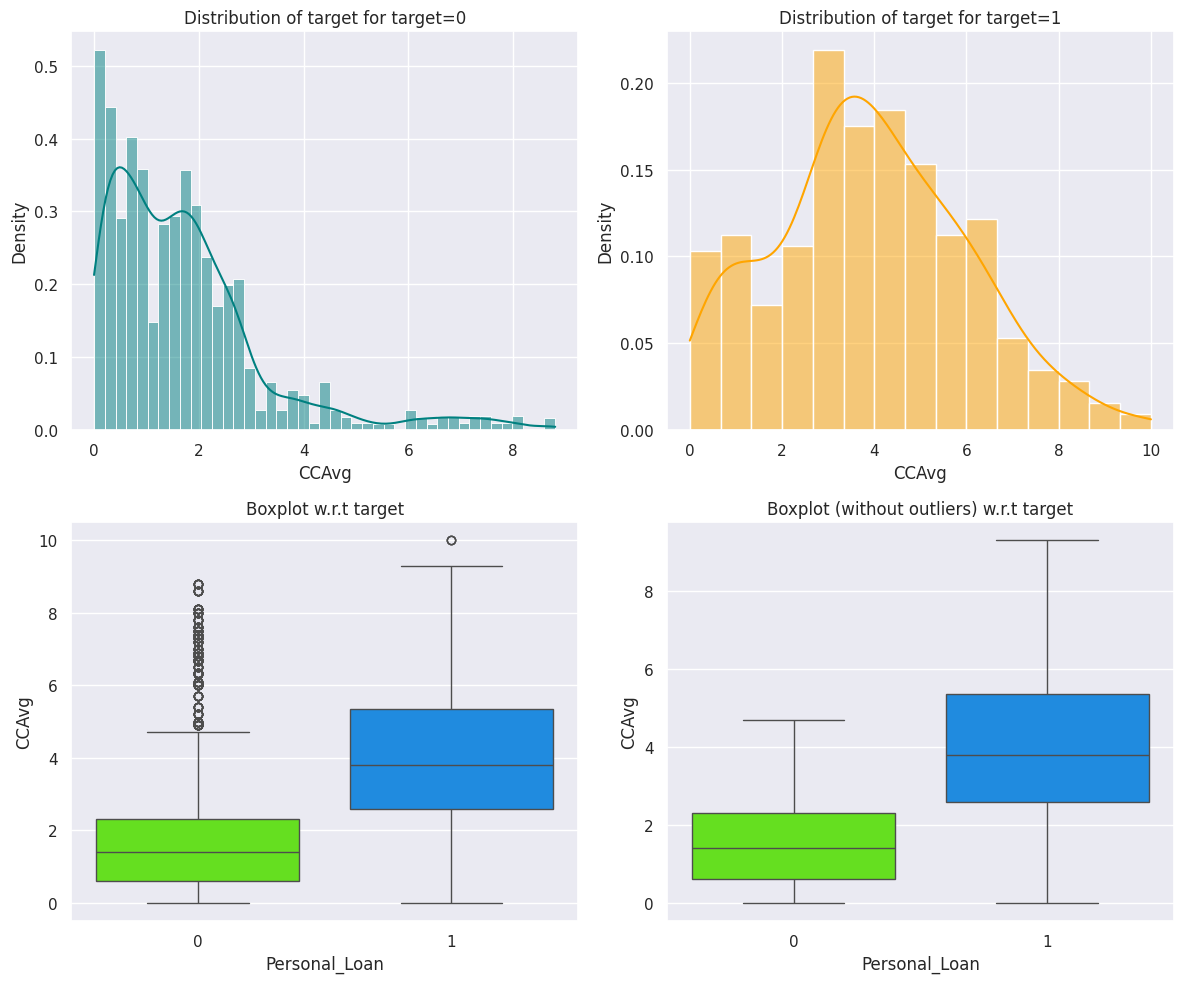

In [60]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Mean value of CCAvg of customers not accepting a personal loan is approximately USD 1.6k much less than the mean value of customers accepting personal loan of approximately USD 4k. Thus, customers who accept personal loan spends more money on monthly basis.

## Model Building

### Model Evaluation Criterion

In [61]:
try:
    df.drop(['experience'], axis=1, inplace=True)
except KeyError:
    print(f"Column experience must already be dropped.")
df.head()

Column experience must already be dropped.


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [63]:
df_dummies = pd.get_dummies(df, columns=['Education', 'Family'], drop_first=True)
df_dummies.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,91107,1.6,0,0,1,0,0,0,False,False,False,False,True
1,45,19,34,90089,1.5,0,0,1,0,0,0,False,False,False,True,False
2,39,15,11,94720,1.0,0,0,0,0,0,0,False,False,False,False,False
3,35,9,100,94112,2.7,0,0,0,0,0,0,True,False,False,False,False
4,35,8,45,91330,1.0,0,0,0,0,0,1,True,False,False,False,True


### Partition Data

In [67]:
X = df_dummies.drop(['Personal_Loan'], axis=1)
X.head(5)

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,91107,1.6,0,1,0,0,0,False,False,False,False,True
1,45,19,34,90089,1.5,0,1,0,0,0,False,False,False,True,False
2,39,15,11,94720,1.0,0,0,0,0,0,False,False,False,False,False
3,35,9,100,94112,2.7,0,0,0,0,0,True,False,False,False,False
4,35,8,45,91330,1.0,0,0,0,0,1,True,False,False,False,True


In [68]:
y = df_dummies['Personal_Loan']
y.head(5)

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [69]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3500, 15)
The shape of X_test:  (1500, 15)


### Build Initial Decision Tree Model

In [70]:
model = DecisionTreeClassifier(criterion='gini',
                               class_weight={0:0.15, 1:0.85},
                               random_state=1)

In [71]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [72]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"],
                         columns=['Predicted - No','Predicted - Yes'])
    #print(df_cm)
    #print("="*80)

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

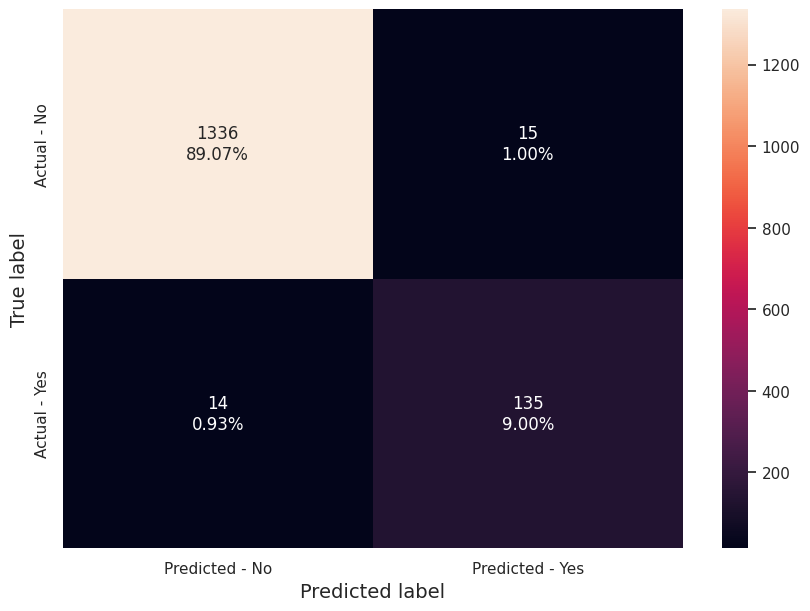

In [73]:
make_confusion_matrix(model, y_test)


In [74]:
y_train.value_counts(normalize=True)


,proportion
Personal_Loan,
0,0.905429
1,0.094571


* ~10% of positive classes, if our model marks each sample as negatvie, we will get 90% accuracy, hence accuracy is not a good metric to evalueate.

In [75]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

In [76]:
#Recall score from baseline model
# Recall on train and test
get_recall_score(model)


Recall on training set :  1.0
Recall on test set :  0.9060402684563759


#Visualization Decision Tree from Baseline Model

In [78]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'Family_2', 'Family_3', 'Family_4']


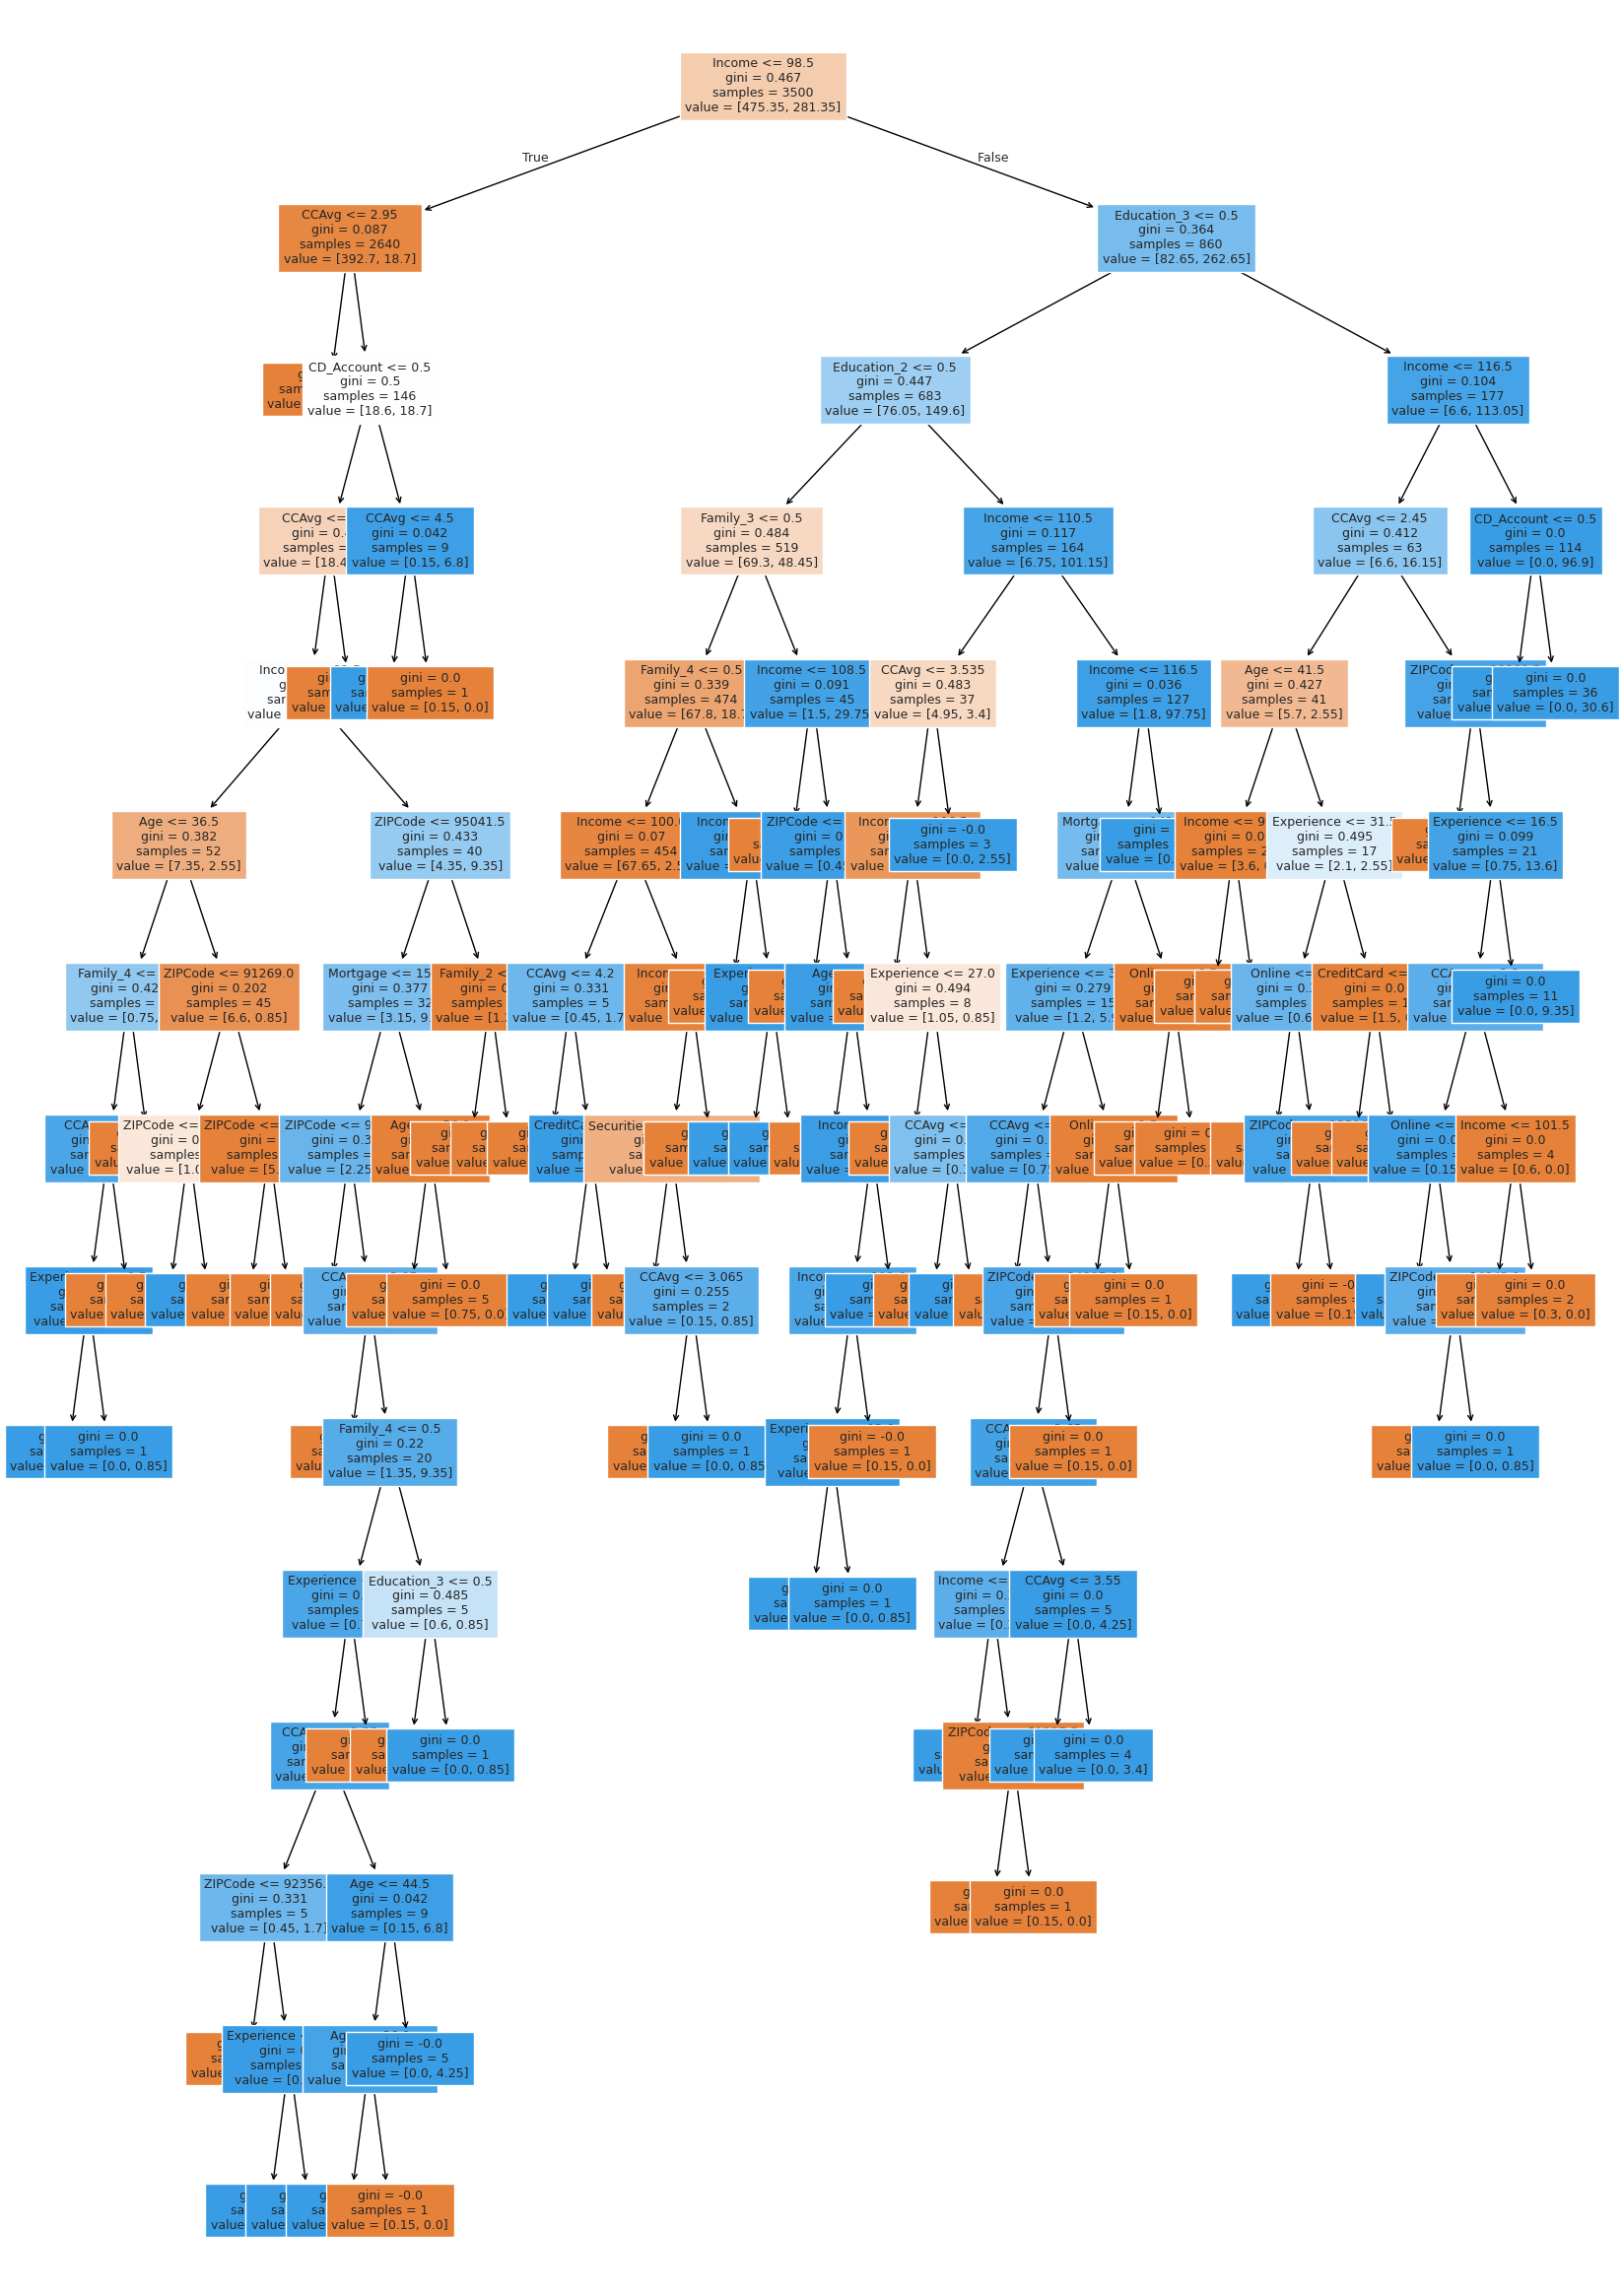

In [79]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* The original tree T0 is complicated and is overfitting the training data set, hence pre-prunning and post proning are to be considered to improve the model performance.
* One very interesting observation is T0.

### Feature Importance from Baseline Model

In [81]:
def importance_plot(model):
    """
    Displays feature importance barplot
    model: decision tree classifier
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    size = len(indices)//2 # to help scale the plot.

    plt.figure(figsize=(10, size))
    plt.title("Feature Importances", fontsize=14)
    plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance", fontsize=12);


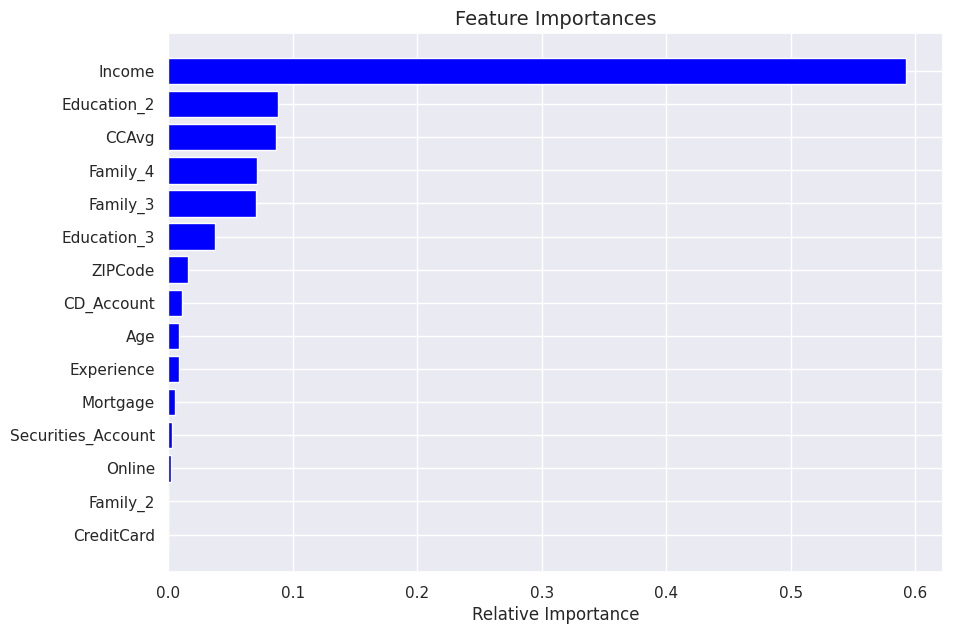

In [82]:
importance_plot(model=model)


In [83]:
pd.DataFrame(model.feature_importances_,
                   columns=["Imp"],
                   index=X_train.columns).sort_values(by='Imp', ascending=False)


,Imp
Income,5.930720e-01
Education_2,8.813411e-02
CCAvg,8.639939e-02
Family_4,7.113628e-02
Family_3,7.032437e-02
Education_3,3.713789e-02
ZIPCode,1.592196e-02
CD_Account,1.099955e-02
Age,8.625509e-03
Experience,8.195643e-03


### Using GridSearch for Hyperparameter Tuning of Tree Model

In [84]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=2, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

### Confusion Matrix Using GridSearchCV

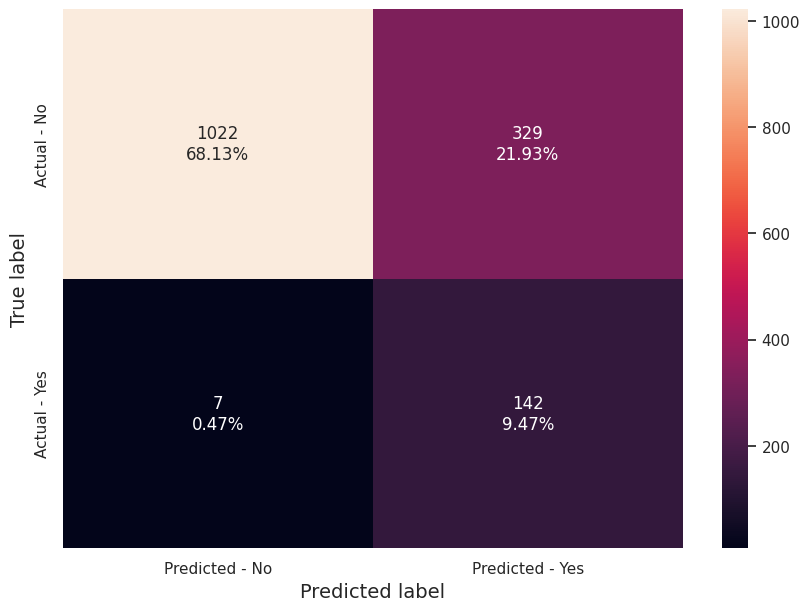

In [85]:
make_confusion_matrix(estimator, y_test)

### Recall Score Using GridSearchCV

In [86]:
get_recall_score(estimator)

Recall on training set :  0.9697885196374623
Recall on test set :  0.9530201342281879


### Visualizing Decision Tree from Best Fit Estimator Using GridSearchCV

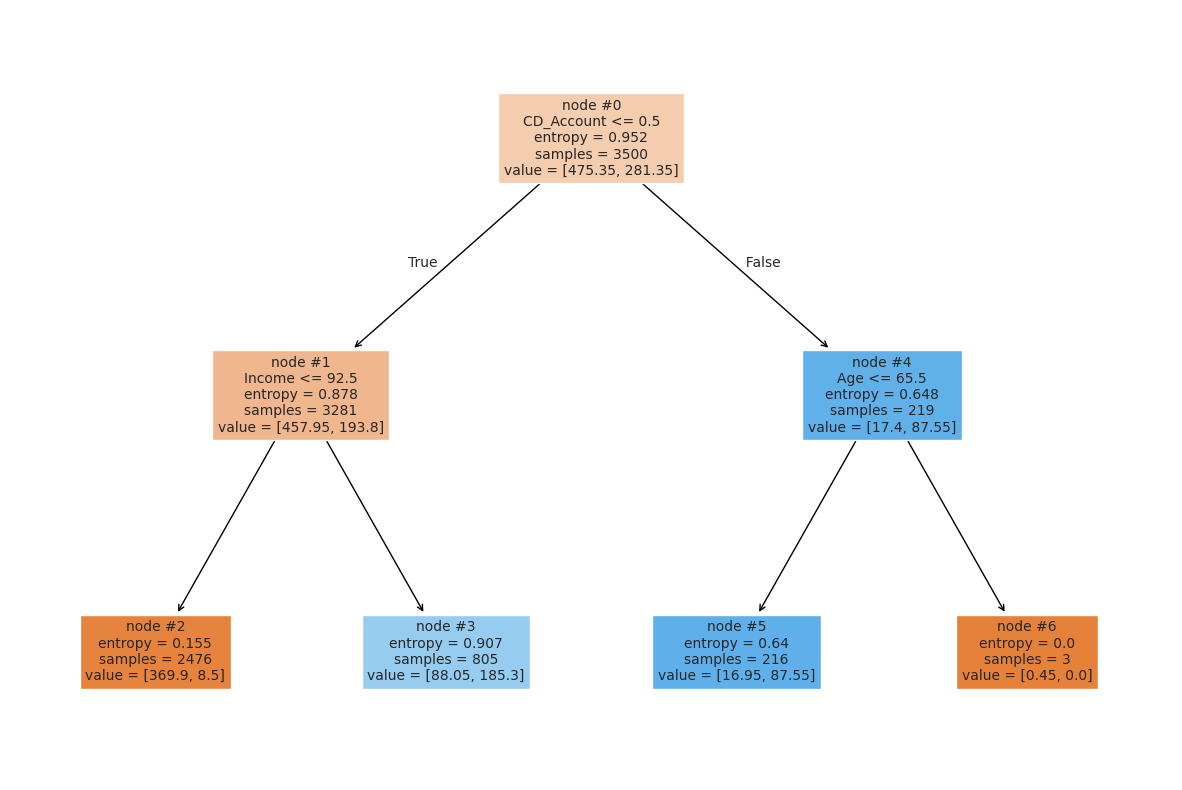

In [87]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [88]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,
                       feature_names=feature_names,
                       show_weights=True))

|--- CD_Account <= 0.50
|   |--- Income <= 92.50
|   |   |--- weights: [369.90, 8.50] class: 0
|   |--- Income >  92.50
|   |   |--- weights: [88.05, 185.30] class: 1
|--- CD_Account >  0.50
|   |--- Age <= 65.50
|   |   |--- weights: [16.95, 87.55] class: 1
|   |--- Age >  65.50
|   |   |--- weights: [0.45, 0.00] class: 0



### Feature Importance Using GridSearchCV

In [89]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
pd.DataFrame(estimator.feature_importances_,
             columns=["Imp"],
             index=X_train.columns).sort_values(by='Imp', ascending=False)
#Here we will see that importance of features has increased

,Imp
Income,0.765675
CD_Account,0.230944
Age,0.003382
Experience,0.000000
ZIPCode,0.000000
CCAvg,0.000000
Mortgage,0.000000
Securities_Account,0.000000
Online,0.000000
CreditCard,0.000000


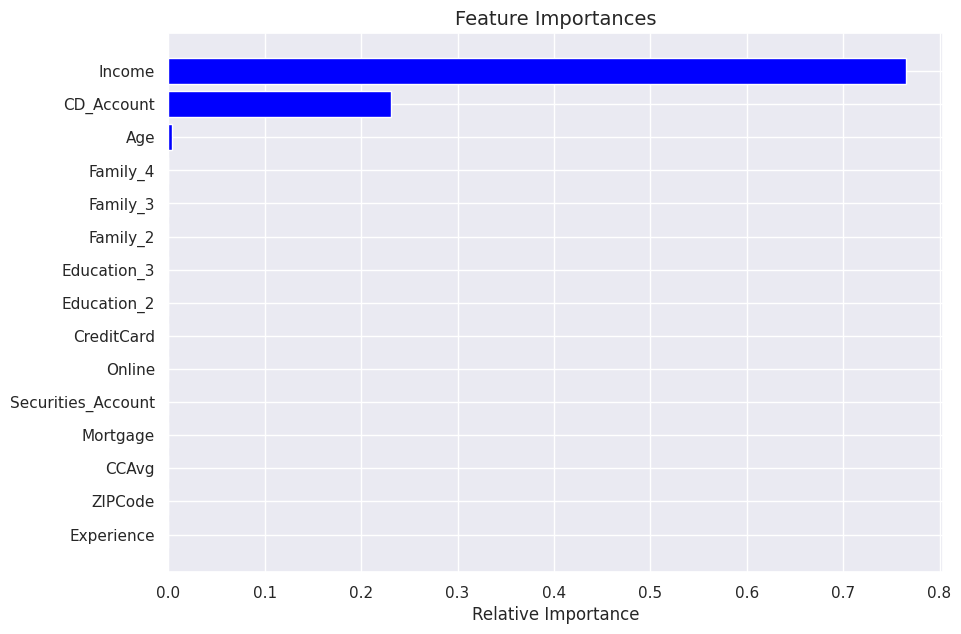

In [90]:
importance_plot(model=estimator)


### Cost Complexity Pruning

### Total Impurity of Leaves vs Effective Alphas of Pruned Tree

In [91]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0:0.15, 1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [92]:
pd.DataFrame(path)


,ccp_alphas,impurities
0,0.000000e+00,-4.535071e-15
1,1.320471e-19,-4.534939e-15
2,7.482671e-19,-4.534191e-15
3,7.482671e-19,-4.533442e-15
4,7.482671e-19,-4.532694e-15
5,7.482671e-19,-4.531946e-15
6,2.420864e-18,-4.529525e-15
7,2.494224e-18,-4.527031e-15
8,2.905037e-18,-4.524126e-15
9,3.521257e-18,-4.520605e-15


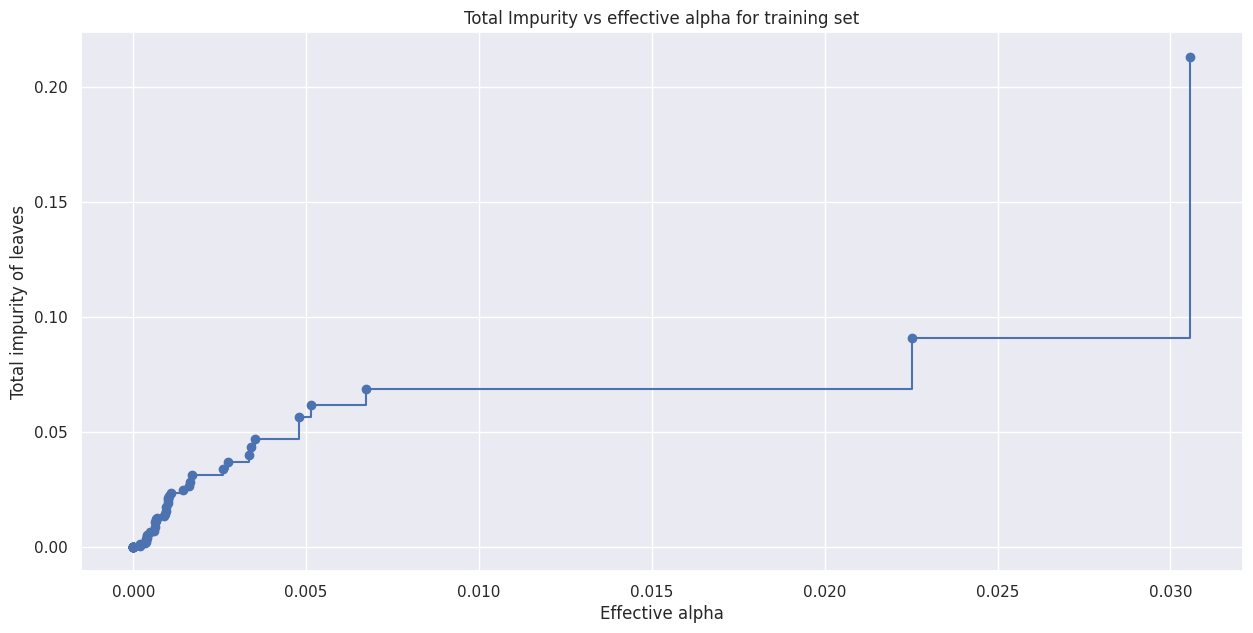

In [93]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [94]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,
                                 ccp_alpha=ccp_alpha,
                                 class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")


Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480934


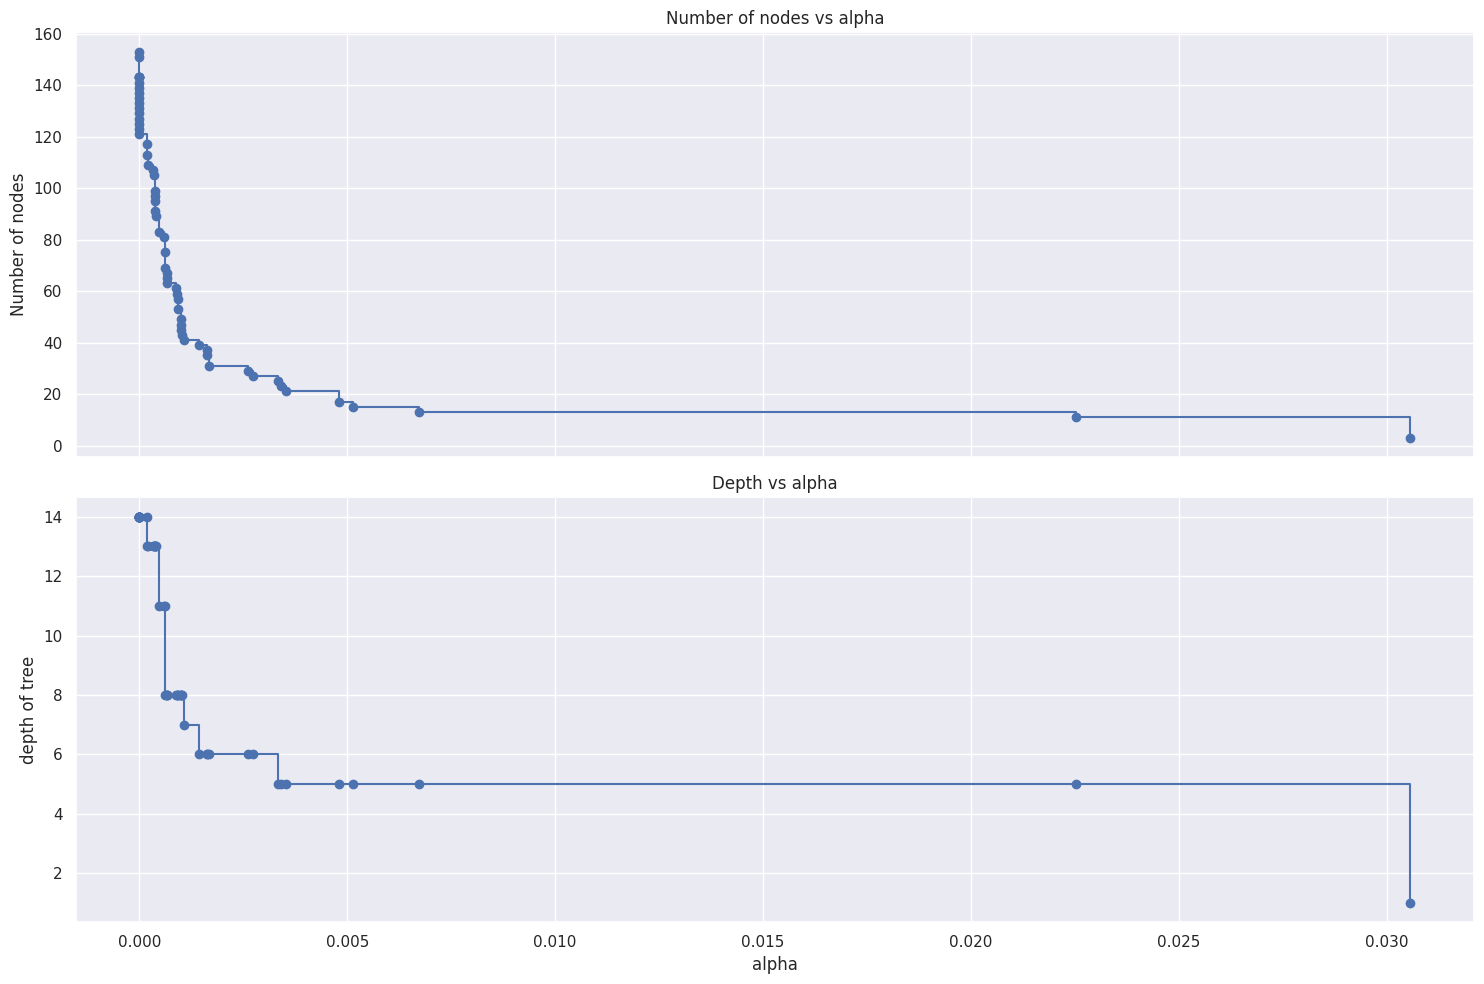

In [95]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* It is observed that alpha = 0.005 the tree seems to have reached the smallest size which is underfitting the data. Hence, we now have an idea that the alpah value that will give us the optimum model performance is definitely below 0.05.

In [96]:
#derive the recall values for train set
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [97]:
#derive the recall values for test set
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [98]:
#calculate the Accuracy of train and test model
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

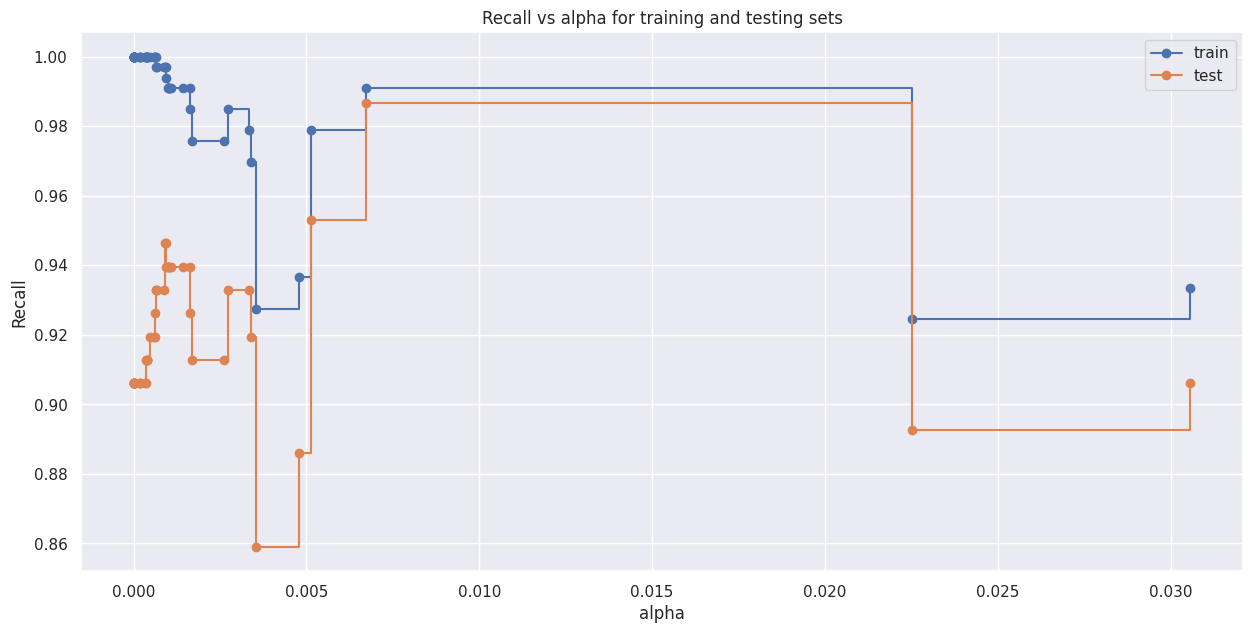

In [99]:
#plotting the accuracy for test and training sets
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas,
        recall_train,
        marker='o',
        label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas,
        recall_test,
        marker='o',
        label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [100]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406661,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [101]:
best_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.006725813690406661,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

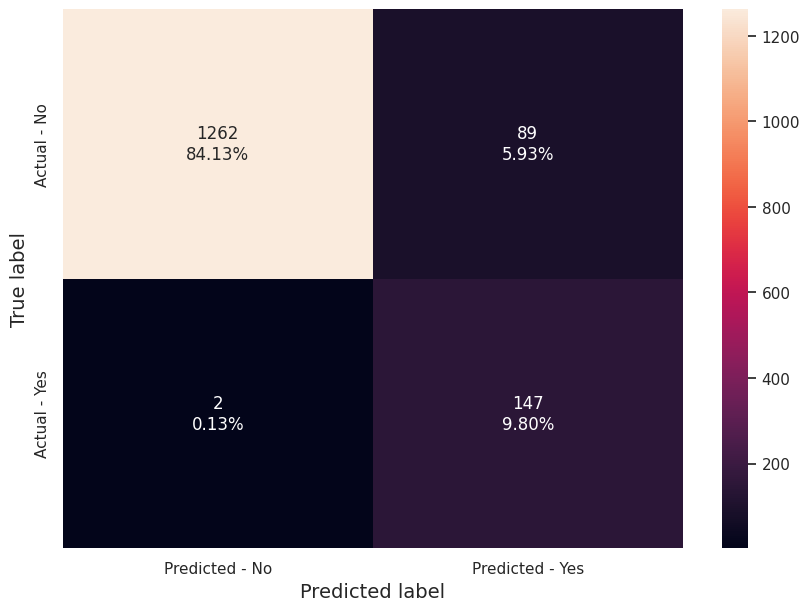

In [102]:
make_confusion_matrix(best_model, y_test)


In [103]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


### Visualizing the Decision Tree

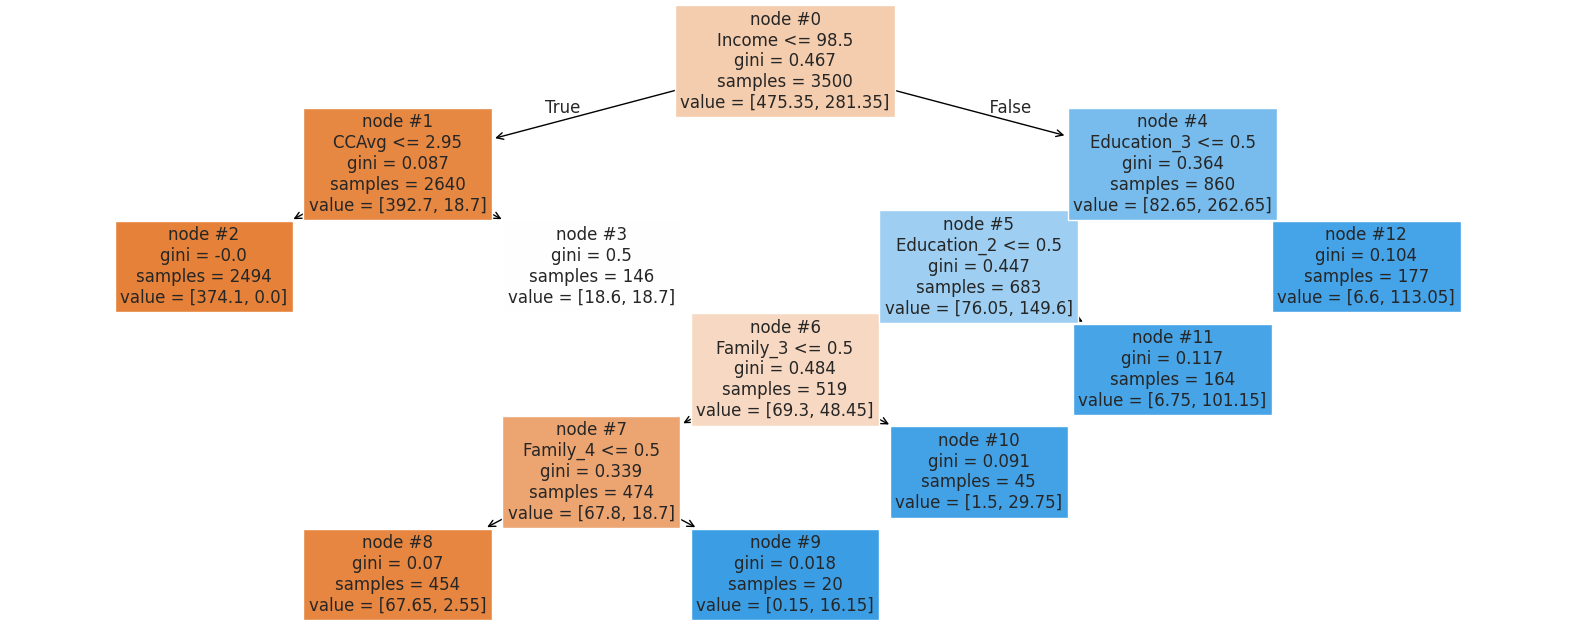

In [104]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



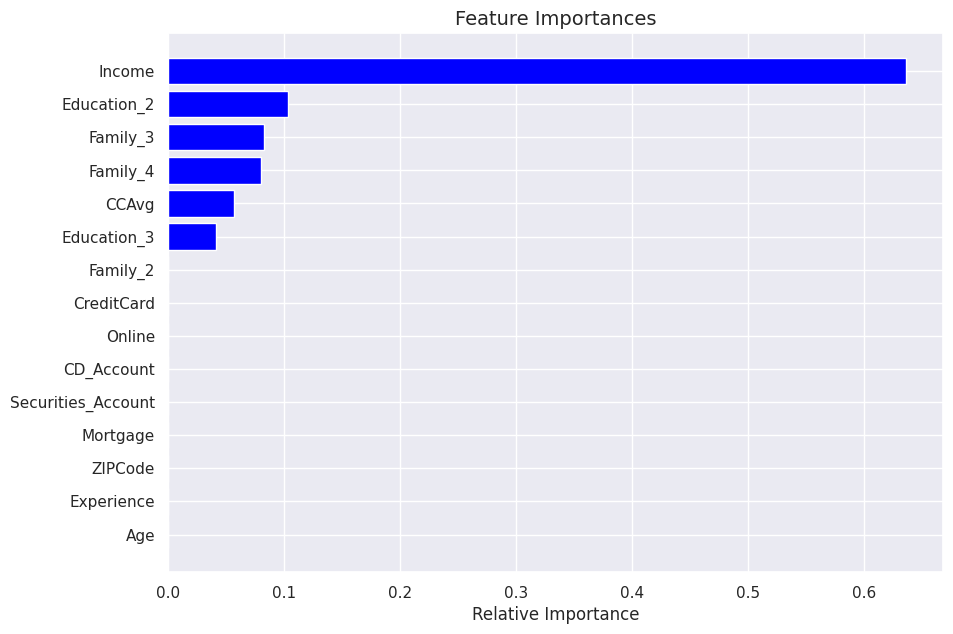

In [106]:
importance_plot(model=best_model)

In [107]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.01,
                                     class_weight={0: 0.15, 1: 0.85},
                                     random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

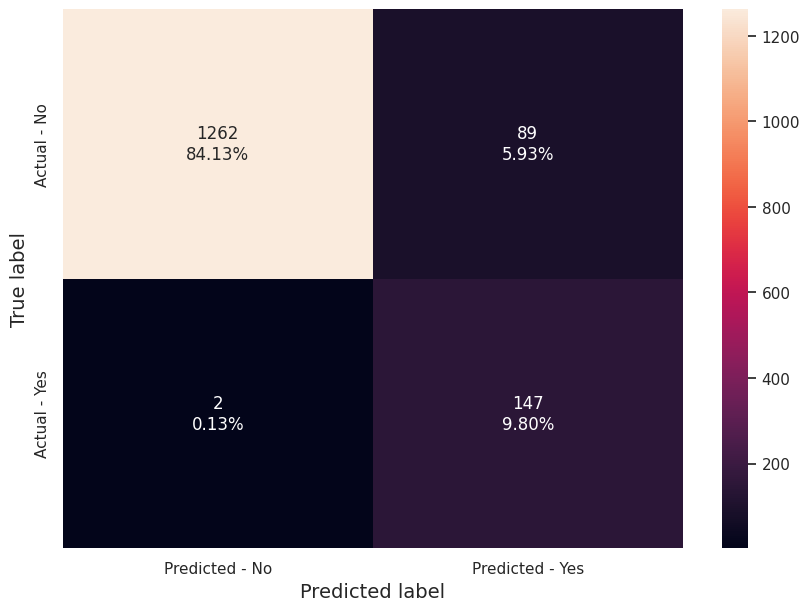

In [108]:
make_confusion_matrix(best_model2, y_test)


In [109]:
get_recall_score(best_model2)


Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


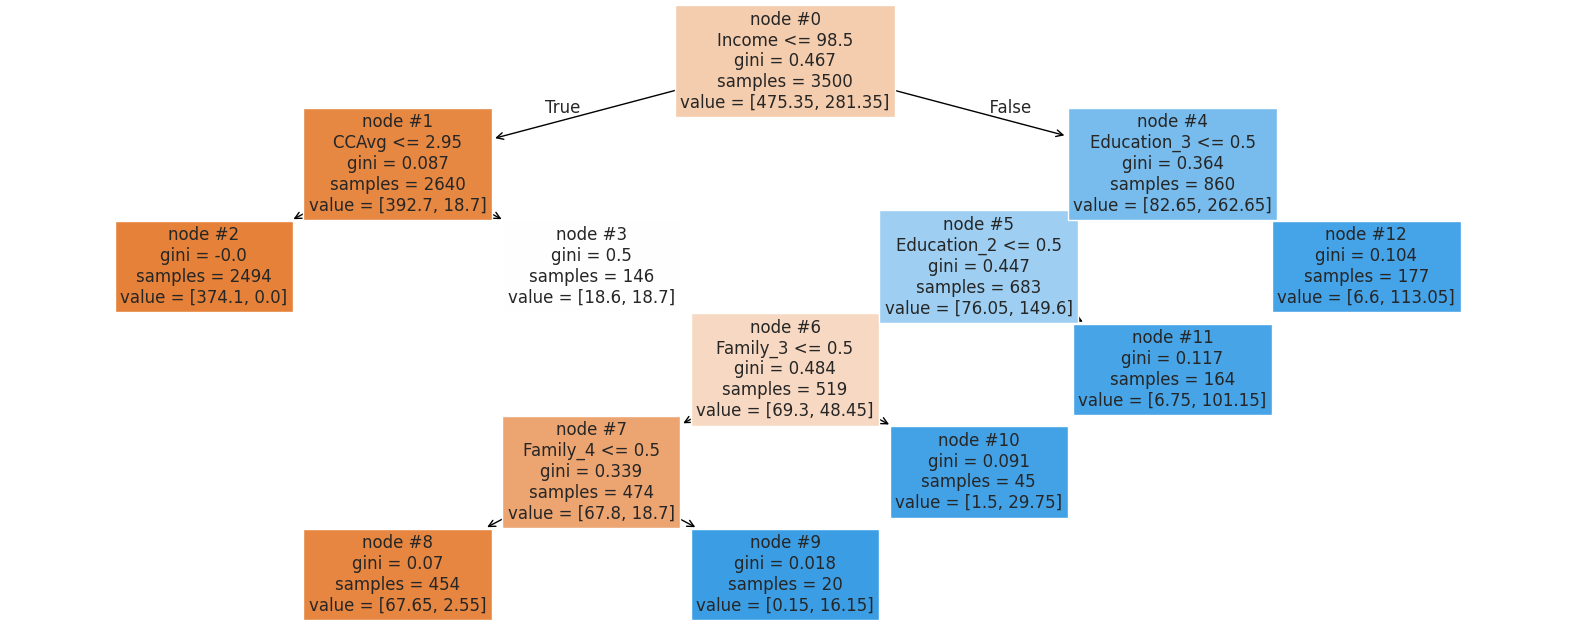

In [110]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model2,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [111]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))


|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



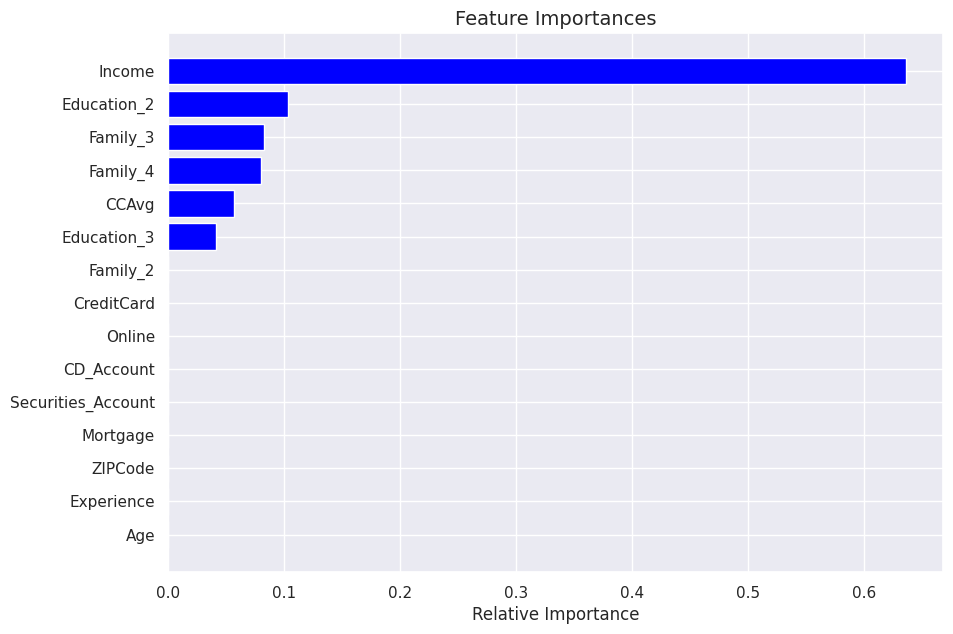

In [112]:
importance_plot(model=best_model2)


In [113]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'],
                                 'Train_Recall':[1, 0.95, 0.99],
                                 'Test_Recall':[0.91, 0.91, 0.98]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.91
1,Decision treee with hyperparameter tuning,0.95,0.91
2,Decision tree with post-pruning,0.99,0.98


## Actionable Insights and Business Recommendations


## Insights
* Income, education, family and credit card usage are the most important features in predicting potential loan customers.
* Customers with separate securities and cd accounts are more likely to get a personal laon.
* Customers who use bank's online faciliites are more likely to get personal oan versus those customers who don't use online facilities.

## Recommendations
* The marketing team is recommended to study the customers profiles first before approaching them for a personal loan offer.
* From the decision tree model, income is the most important feature. If customer's income is less than 98.5k, there is a good chance that the customer won't have personal loan.
* Customers who use online facilites were more likely to have personal loans.
* Make the site more user-friendly and encourage those customers who don't use the facilities to use online facilities. Make the application process to get personal laons easy with a better user experience.


___